## Title of Research Paper


## Introduction
What demographic and voting factors within a county best explain the US 2020 presidential election results?\
Write a brief introduction of your project (two to four para-graphs)

## Dataset Cleaning and Loading

- Name of your main dataset and additional datasets if you are using them in this report.
- Where are those data come from? In what format? (i.e. csv) In this project, all dataset files are in CSV format, so they could be directly loaded to jupyter notebook.
- When merging data from different datasets, it needs to identify fields are used to merge the datasets. In this step, we need to standardise data column name (for better readable code) and field format (i.e. all uppercase, remove unnecessary word/spaces, data type conversion if necessary).  
- When merging datasources, some data might not be availble from one of them, it needs to identify the impact and clearly state all assumptions.


In [362]:
import pandas as pd
import numpy as np
import qeds
import matplotlib.pyplot as plt

# load president_county_candidate.csv
president_county_cand = pd.read_csv('..\\Data\\president_county_candidate.csv')
#president_county_cand.head()

# load senate_county_candidate.csv
senate_county_cand = pd.read_csv('..\\Data\\senate_county_candidate.csv')
senate_county_cand.head()

# load governors_county_candidate.csv
governor_county_cand = pd.read_csv('..\\Data\\governors_county_candidate.csv')
governor_county_cand.head()

# load house_county_candidate.csv
house_cand = pd.read_csv('..\\Data\\house_candidate.csv')
house_cand.head()

# load US_Election_dataset_v1.csv
us_election = pd.read_csv("..\\Data\\US_Election_dataset_v1.csv")
#us_election.head()

# data cleaning: president_county_cand
# col 'state'
president_county_cand['state'] = president_county_cand['state'].str.upper()
president_county_cand['state'] = president_county_cand['state'].str.strip()
president_county_cand['state'] = president_county_cand['state'].str.replace(" ", "")
# col 'county'
president_county_cand['county'] = president_county_cand['county'].str.upper()
president_county_cand['county'] = president_county_cand['county'].str.strip()
president_county_cand['county'] = president_county_cand['county'].str.replace(" COUNTY", "")
# president_county_cand_won: filter in won is True
president_county_cand_won = president_county_cand.loc[president_county_cand['won'] == True].copy()
president_county_cand_won

# data cleaning: governor_county_cand
# col 'state'
governor_county_cand['state'] = governor_county_cand['state'].str.upper()
governor_county_cand['state'] = governor_county_cand['state'].str.strip()
# col 'County Name'
governor_county_cand['county'] = governor_county_cand['county'].str.upper()
governor_county_cand['county'] = governor_county_cand['county'].str.strip()
governor_county_cand['county'] = governor_county_cand['county'].str.replace(" COUNTY", "")
governor_county_cand['county'] = governor_county_cand['county'].str.upper()
# filter in won is True
governor_county_cand_won = governor_county_cand.loc[governor_county_cand['won'] == True].copy()

# data cleaning: house_cand
# col 'state'
house_cand['district'] = house_cand['district'].str.upper()
house_cand['district'] = house_cand['district'].str.strip()
# filter in won is True
house_cand_won = house_cand.loc[house_cand['won'] == True].copy()
#print(house_cand_won)

# data cleaning: senate_county_cand
# col 'state'
senate_county_cand['state'] = senate_county_cand['state'].str.upper()
senate_county_cand['state'] = senate_county_cand['state'].str.strip()
# col 'County Name'
senate_county_cand['county'] = senate_county_cand['county'].str.upper()
senate_county_cand['county'] = senate_county_cand['county'].str.strip()
senate_county_cand['county'] = senate_county_cand['county'].str.replace(" COUNTY", "")
senate_county_cand['county'] = senate_county_cand['county'].str.upper()
# filter in records with max total_votes (won)
senate_county_cand_won = senate_county_cand.copy()
idx = senate_county_cand_won.groupby(['state', 'county'])['total_votes'].idxmax()
senate_county_cand_won = senate_county_cand_won.loc[idx]
#print(senate_county_cand_won)

# data cleaning: us_election
us_election = us_election.rename({'State': 'state', 'County Name': 'county'}, axis=1)
# col 'state'
us_election['state'] = us_election['state'].str.upper()
us_election['state'] = us_election['state'].str.strip()
# col 'County Name'
us_election['county'] = us_election['county'].str.upper()
us_election['county'] = us_election['county'].str.strip()
us_election['county'] = us_election['county'].str.replace(" COUNTY", "")
us_election['county'] = us_election['county'].str.upper()
#us_election


In [363]:
# president_county_cand: prepare columns
party_map = {'DEM': 0.0, 'REP': 1.0}
president_county_cand['party'] = president_county_cand['party'].map(lambda x: party_dict.get(x, 'Third-Party'))

# president_county_cand_won: prepare columns
president_county_cand_won['Party_Index'] = president_county_cand_won['party'].map(party_map)
party_dict = {'DEM': 'Democrat', 'REP': 'Republican'}
president_county_cand_won['party'] = president_county_cand_won['party'].map(lambda x: party_dict.get(x, 'Third-Party'))
#print(president_county_cand_won.head())

# senate_county_cand_won: prepare columns
senate_county_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in senate_county_cand_won['party']]
senate_county_cand_won['party'] = senate_county_cand_won['party'].map(lambda x: party_dict.get(x, 'Third-Party'))
#print(senate_county_cand_won.head())

# governor_county_cand_won: prepare columns
governor_county_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in governor_county_cand_won['party']]
governor_county_cand_won['party'] = governor_county_cand_won['party'].map(lambda x: party_dict.get(x, 'Third-Party'))
#print(governor_county_cand_won.head())

# house_cand_won: prepare columns
house_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in house_cand_won['party']]
house_cand_won['party'] = house_cand_won['party'].map(lambda x: party_dict.get(x, 'Third-Party'))
#print(house_cand_won.head())

# us_election: prepare new columns
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.strip()
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.replace(',', '')
us_election['Median_Income'] = us_election['Median income (dollars)'].astype('float')
us_election['Won_Vote'] = us_election[["2020 Democrat vote raw","2020 Republican vote raw","2020 other vote raw"]].max(axis=1)
us_election['Total_Vote'] = us_election["2020 Democrat vote raw"] + us_election["2020 Republican vote raw"] + us_election["2020 other vote raw"]
us_election['Vote_Percentage'] = (us_election["Won_Vote"] / us_election["Total_Vote"]) * 100
us_election['Degree_Or_Higher_Percentage'] = us_election["Associates Degree"].str.rstrip('%').astype('float') + us_election["Bachelors Degree"].str.rstrip('%').astype('float') + us_election["Graduate or professional degree"].str.rstrip('%').astype('float')
#us_election.head()

# president_county_cand: adjust 'party
#party_dict = {'DEM': 'Democrat', 'REP': 'Republican'}
#president_county_cand['party'] = president_county_cand['party'].map(lambda x: party_dict.get(x, 'Third-Party'))

# merge datasets
final_df = pd.merge(president_county_cand_won, us_election, on=['state', 'county'], how="inner")
#print(final_df.count())

# final_df: president_county_cand: adjust 'party
#final_df['party'] = final_df['party'].map(lambda x: party_dict.get(x, 'Third-Party'))




## Summary Statistics Tables
Create at least four plots/figures/histograms for a passing mark.\
State and describe the X and Y variables.
Party Index: 0 = democrat, 1 = Republican


|                   |  Mean    | Median   |  Mode   |  Range               |  Min     |   Max     |  Count  | Standard Deviation  |
| ----------------- | ------   | ------   | ------  | -------------------- | -----    | ------    | ------- | ------------------- |
| **Income**        | 63305.60 | 60931.00 | 6125.00 | 17900.00 - 170463.00 | 17900.00 | 170463.00 | 3142    | 16819.01            |
| **Population**    |          |          |         |                      |          |           |         |                     |
| **Education**     | 33.11%   | 31.60%   | 34.50%  | 7.50% - 81.00%       | 81.00%   | 7.50%     | 3143    | 10.40%              |
| **Urban Density** |          |          |         |                      |          |           |         |                     |


|               |  Mean    | Median   |  Mode   |  Range               |  Min     |   Max     |  Count  | Standard Deviation  |
| ------------- | ------   | ------   | ------  | -------------------- | -----    | ------    | ------- | ------------------- |
| **Governor**  | 0.921951 | 1.0      | 1.0     | 0.0 - 1.0            | 0.0      | 1.0       | 1025    | 0.268379            |
| **House**     | 0.488532 | 0.0      | 0.0     | 0.0 - 1.0            | 0.0      | 1.0       | 436     | 0.500443            |
| **Senate**    | 0.309378 | 0.0      | 0.0     | 0.0 - 1.0            | 0.0      | 1.0       | 3423    | 0.462305            |



In [365]:
# Get statistics

print("\n====================")
print("Governor:")
print("====================")
print(governor_county_cand_won['Party_Index'].describe())
print("\n====================")
print("Governor - MEDIAN:")
print("====================")
print(governor_county_cand_won['Party_Index'].median())
print("\n====================")
print("Governor - MODE:")
print("====================")
print(governor_county_cand_won['Party_Index'].mode())

print("\n====================")
print("House:")
print("====================")
print(house_cand_won['Party_Index'].describe())
print("\n====================")
print("House - MEDIAN:")
print("====================")
print(house_cand_won['Party_Index'].median())
print("\n====================")
print("House - MODE:")
print("====================")
print(house_cand_won['Party_Index'].mode())

print("\n====================")
print("Senate:")
print("====================")
print(senate_county_cand_won['Party_Index'].describe())
print("\n====================")
print("Senate - MEDIAN:")
print("====================")
print(senate_county_cand_won['Party_Index'].median())
print("\n====================")
print("Senate - MODE:")
print("====================")
print(senate_county_cand_won['Party_Index'].mode())

# generate statistics
print("\n====================")
print("4 Variables:")
print("====================")
columns = ["Median_Income", "Degree_Or_Higher_Percentage", "Density per square km", "Gini Index"]
print(us_election[columns].describe().transpose())
print("\n====================")
print("4 Variables - MEDIAN:")
print("====================")
print(us_election[columns].median())
print("\n====================")
print("4 Variables - MODE:")
print("====================")
print(us_election[columns].mode())





Governor:
count    1025.000000
mean        0.921951
std         0.268379
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Party_Index, dtype: float64

Governor - MEDIAN:
1.0

Governor - MODE:
0    1.0
Name: Party_Index, dtype: float64

House:
count    436.000000
mean       0.488532
std        0.500443
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Party_Index, dtype: float64

House - MEDIAN:
0.0

House - MODE:
0    0.0
Name: Party_Index, dtype: float64

Senate:
count    3423.000000
mean        0.309378
std         0.462305
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Party_Index, dtype: float64

Senate - MEDIAN:
0.0

Senate - MODE:
0    0.0
Name: Party_Index, dtype: float64

4 Variables:
                              count          mean           std         min  \
Median_Income                3142.0 

## Plots, Histograms, Figures

Create at least four plots/figures/histograms for a passing mark.

### Graph-1: Number of counties won President vs Party

[Text(0, 0, '514'), Text(0, 0, '2575')]

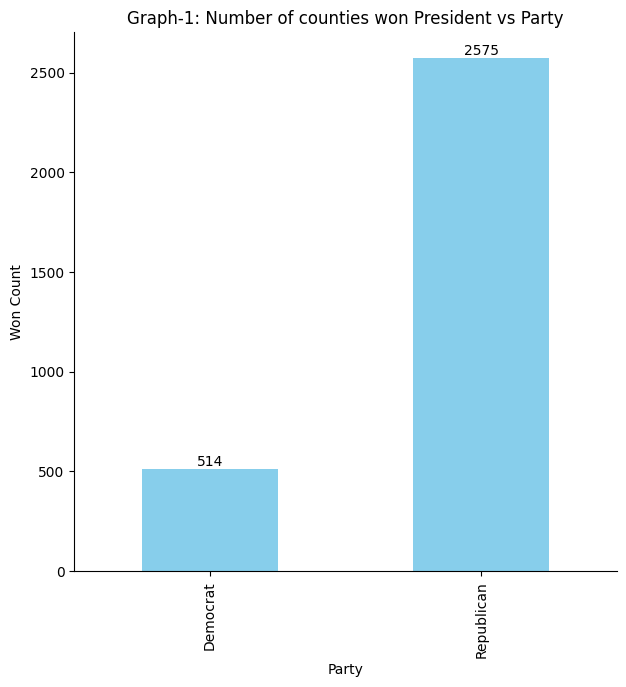

In [522]:
# Graph-1: Number of counties won President vs Party

# calculate value counts
counts = final_df['party'].value_counts()

fig, ax = plt.subplots(figsize=(7, 7))
counts.sort_index().plot(kind='bar', color='skyblue')

# plot barchart
ax.set_xlabel('Party')
ax.set_ylabel('Won Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Graph-1: Number of counties won President vs Party")
ax.bar_label(ax.containers[0])


### Graph-2: Percentage of votes won within the county vs Median Income

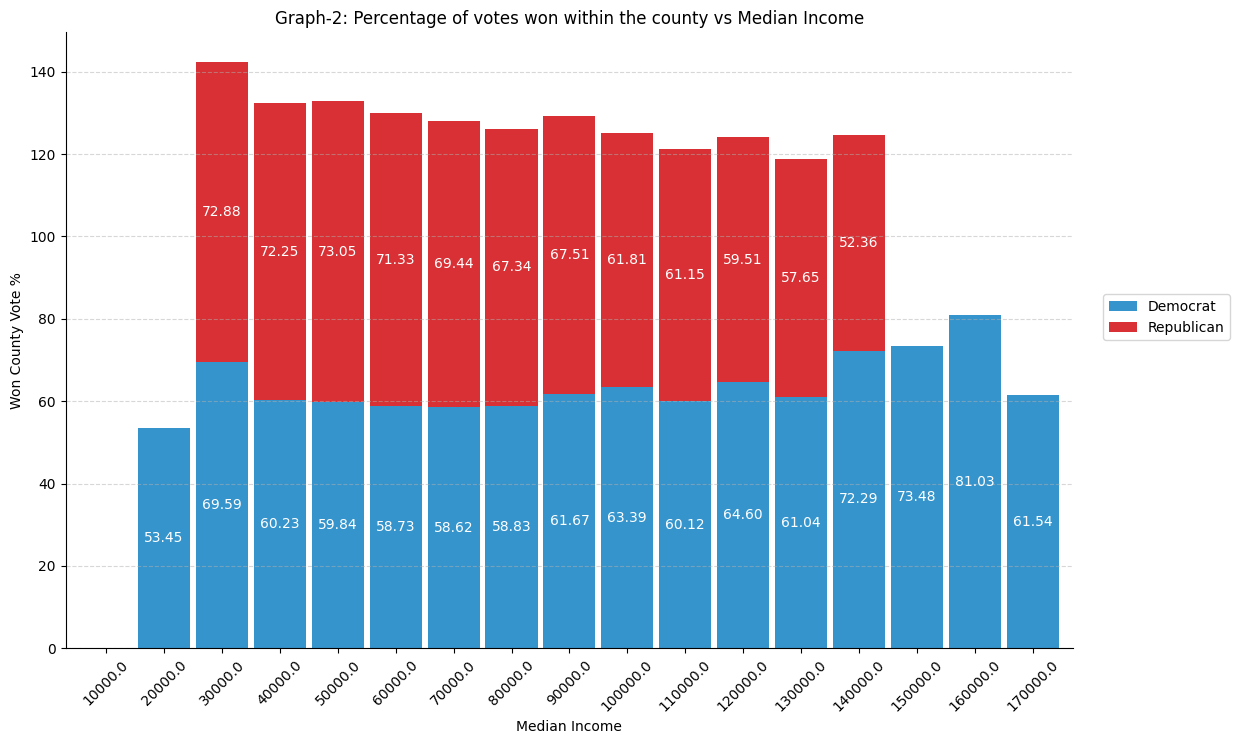

In [545]:
# Graph-2: Percentage of votes won within the county vs Median Income
import matplotlib.ticker as ticker

# select columns to be ploted
data_df = final_df[['Median_Income', 'Vote_Percentage', 'party']]

# Define custom colors for each type
colors = ['#3594cc', '#d83034', '#36b700']  

# group Education attainment in range
income_bins = np.arange(5000, 180000, 10000)
pivot1_df = data_df.copy()
pivot1_df['IncomeGroup'] = pd.cut(data_df["Median_Income"], bins=income_bins)
pivot1_df['IncomeGroupMid'] = pivot1_df['IncomeGroup'].apply(lambda x: x.mid)
pivot2_df = pivot1_df.groupby(['party', 'IncomeGroupMid'], observed=False).agg(Vote_Percentage_Mean=('Vote_Percentage', 'mean')).reset_index().copy()

# Pivot the DataFrame
pivot2_df = pivot2_df.pivot(index='IncomeGroupMid', columns='party', values='Vote_Percentage_Mean')

# Plotting with custom colors
ax = pivot2_df.plot(kind='bar', stacked=True, figsize=(13, 8), width=0.9, color=colors)

# Adding values on the bars
for i, party in enumerate(pivot2_df.index):
    bottom = 0  # Track the bottom of each stack
    for j, type_col in enumerate(pivot2_df.columns):
        value = pivot3_df.loc[party, type_col]
        if value > 0:  # Only display values greater than 0
            ax.text(
                x=i,  # x-position of the bar
                y=bottom + value / 2,  # y-position (middle of the stack segment)
                s=f'{value:.2f}',  # Display value with 2 decimal places
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                color='white',  # Text color
                fontsize=10  # Font size
            )
        bottom += value  # Update the bottom for the next stack segment

# Custom formatter function
#def format_ticks(value, _):
#    if value >= 1000:
#        return f'{int(value / 1000)}k'  # Format as "k" for thousands
#
# Apply the formatter to the x-axis
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Adding labels and title
plt.xlabel('Median Income')
plt.ylabel('Won County Vote %')
plt.title('Graph-2: Percentage of votes won within the county vs Median Income')
plt.legend(loc=(1.03, 0.5))
plt.xticks(rotation = 45)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()


### Graph-3: Percentage of votes for the won party in the county vs Degree attainment (Assoc. Degree/ Bachelor, or higher)


Text(0.5, 1.0, 'Democrat')

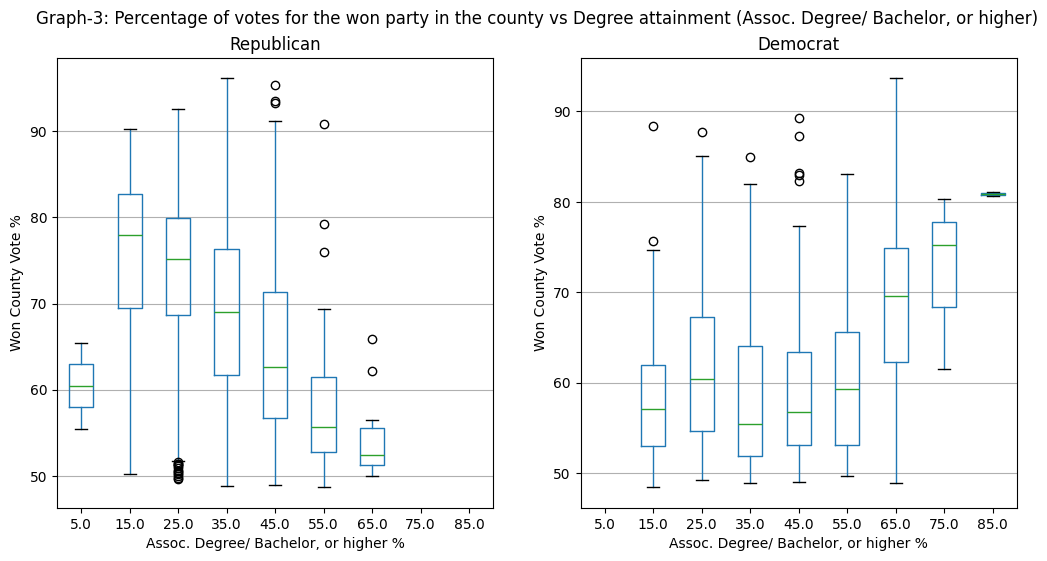

In [368]:
# Graph-3: Graph-3: Percentage of votes for the won party in the county vs Degree attainment (Assoc. Degree/ Bachelor, or higher)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# select columns to be ploted
data_df = final_df[["Degree_Or_Higher_Percentage", "Vote_Percentage", "party"]]

# group Education attainment in range
education_bins = np.arange(0, 100, 10)
g2_df = data_df.copy()
g2_df['EducationGroup'] = pd.cut(data_df["Degree_Or_Higher_Percentage"], bins=education_bins)
g2_df['EducationGroupMid'] = g2_df['EducationGroup'].apply(lambda x: x.mid)
rep_df = g2_df[g2_df['party']=='Republican'].copy()
rep_df.boxplot(by='EducationGroupMid', column =['Vote_Percentage'], ax=ax[0], grid = False) 
dem_df = g2_df[g2_df['party']=='Democrat'].copy()
dem_df.boxplot(by='EducationGroupMid', column =['Vote_Percentage'], ax=ax[1], grid = False) 


fig.suptitle("Graph-3: Percentage of votes for the won party in the county vs Degree attainment (Assoc. Degree/ Bachelor, or higher)")
ax[0].grid(axis='y')
ax[0].set_xlabel("Assoc. Degree/ Bachelor, or higher %")
ax[0].set_ylabel('Won County Vote %')
ax[0].set_title("Republican")
ax[1].grid(axis='y')
ax[1].set_xlabel("Assoc. Degree/ Bachelor, or higher %")
ax[1].set_ylabel('Won County Vote %')
ax[1].set_title("Democrat")

### Graph-4: Percentage of votes won within county vs Population of county

### Graph-5: Number of votes for each party president vs State

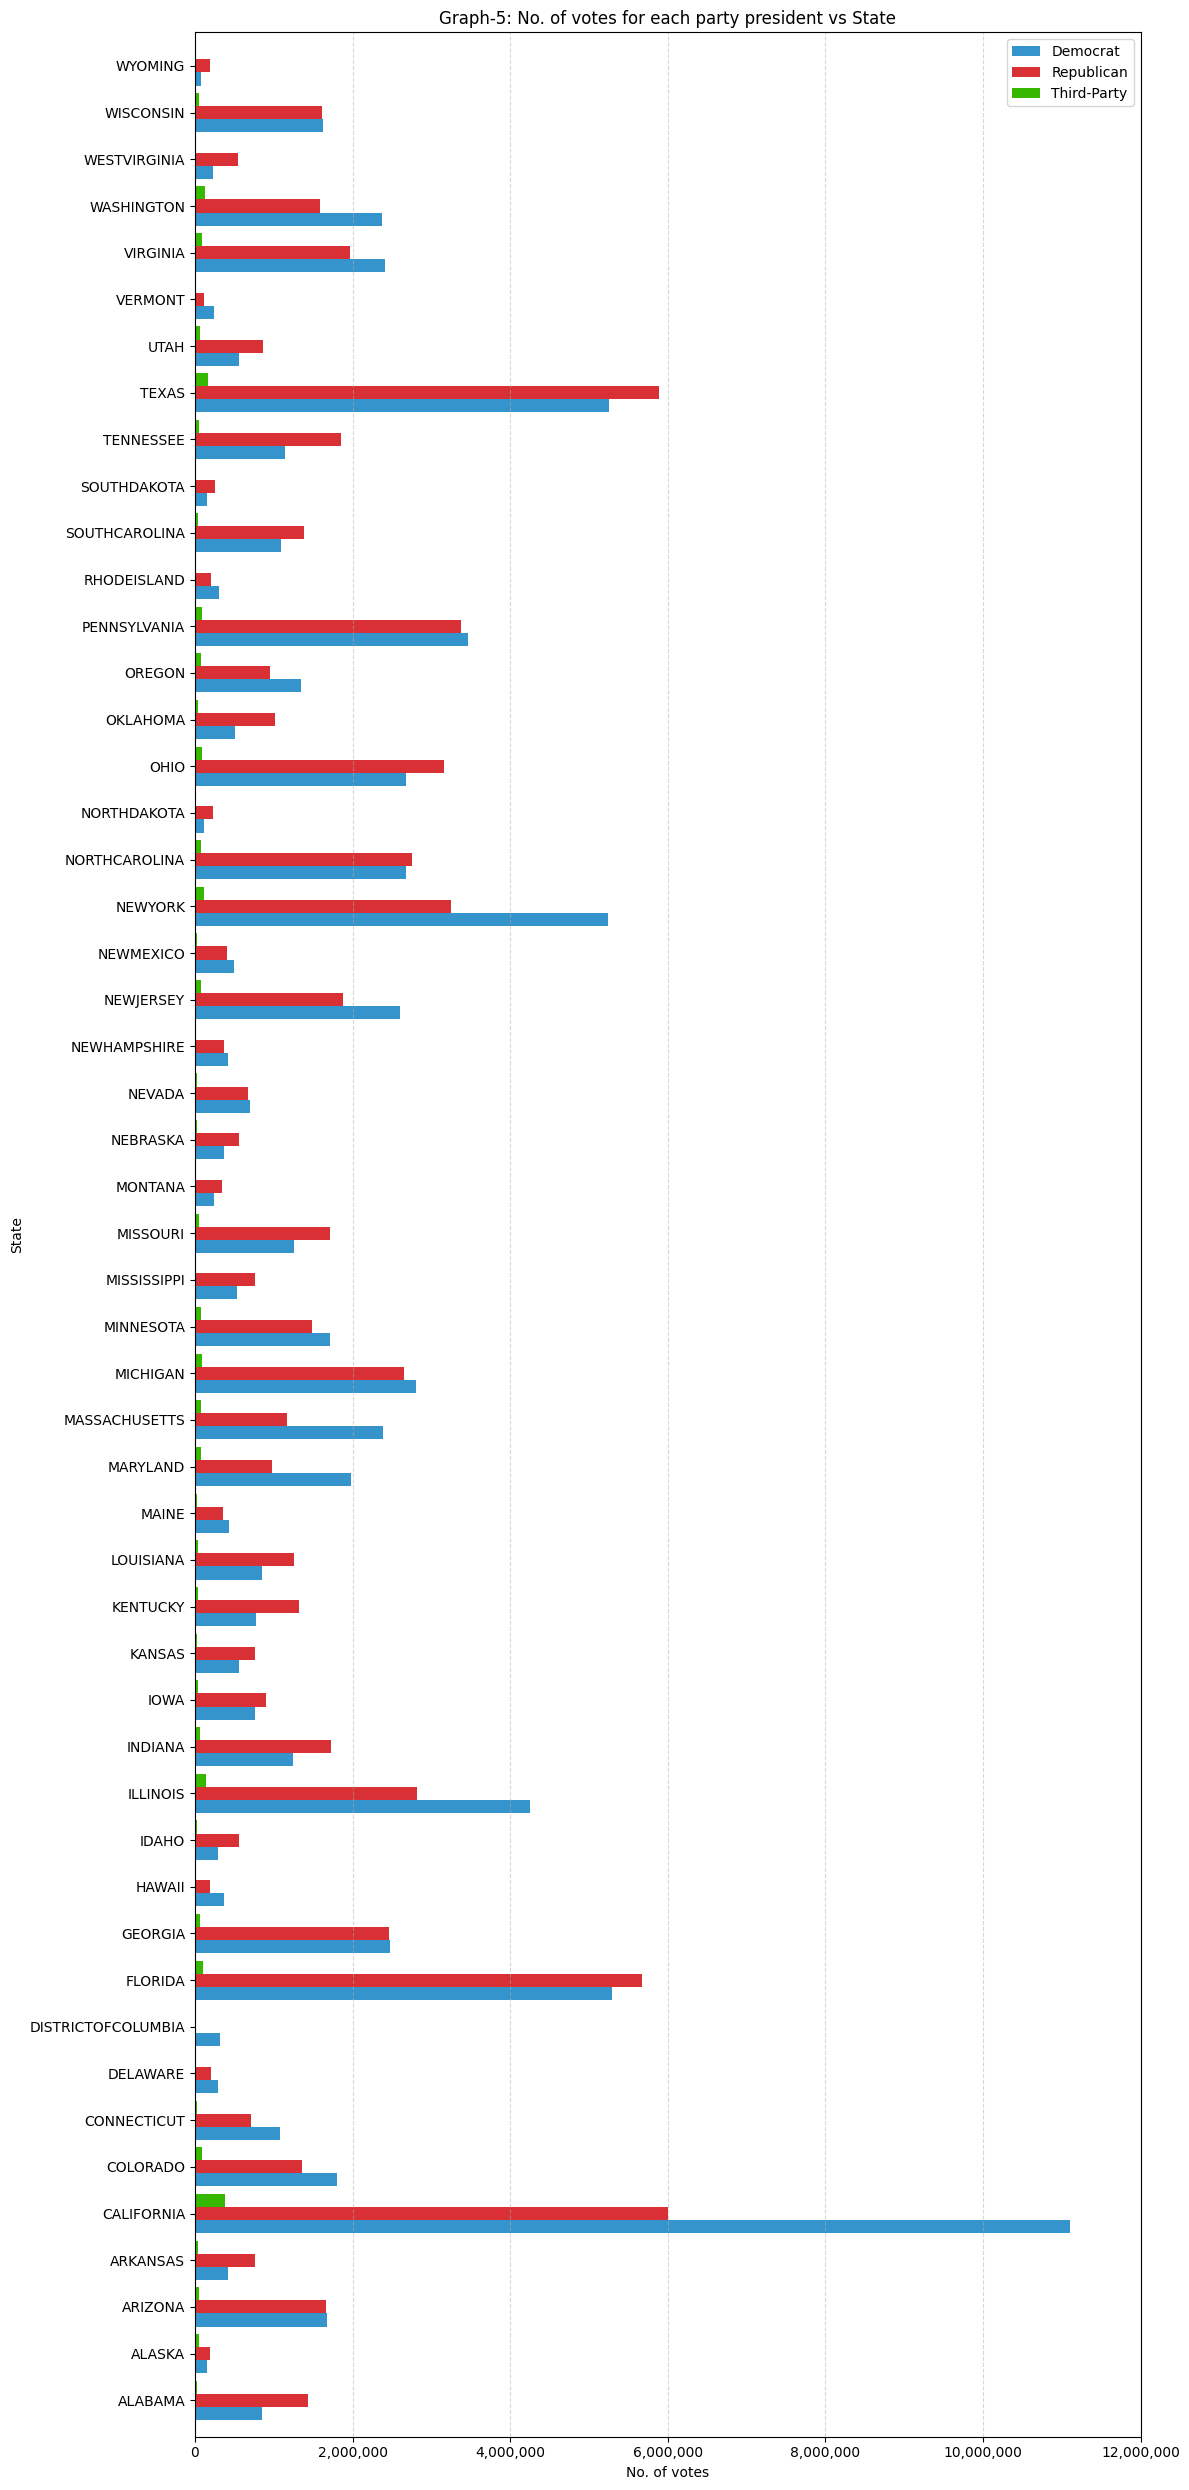

In [412]:
# Graph-5: Number of votes for each party president vs State
from matplotlib.ticker import FuncFormatter

# select columns to be ploted
data_df = president_county_cand.groupby(['state','party']).agg({'total_votes': 'sum'})
data_df = data_df.reset_index()
#data_df

# Reshape the DataFrame using pivot_table
pivot_df = data_df.pivot_table(index='state', columns='party', values='total_votes', aggfunc='sum').reset_index()

# Fill missing values with 0 (if any)
pivot_df = pivot_df.fillna(0)

# plot graph
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 25))

# Define custom colors for each type
colors = {
    'Democrat': '#3594cc',  # Blue
    'Republican': '#d83034',  # Red
    'Third-Party': '#36b700'  # Green
}

# Number of states
n_states = len(pivot_df['state'])

# Height of the bars
bar_height = 0.28

# Positions for the bars
index = np.arange(n_states)

# Plotting each party
for i, party in enumerate(['Democrat', 'Republican', 'Third-Party']):
    ax.barh(index + i * bar_height, pivot_df[party], bar_height, label=party, color=colors[party])

# Adding labels and title
ax.set_xlabel('No. of votes')
ax.set_ylabel('State')
ax.set_title('Graph-5: No. of votes for each party president vs State')
ax.set_yticks(index + bar_height)
ax.set_yticklabels(pivot_df['state'])
ax.legend()
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Format x-axis ticks as integers
def format_votes(x, pos):
    return f'{int(x):,}'  # Format as integer with commas as thousand separators

# format x-axis label
ax.xaxis.set_major_formatter(FuncFormatter(format_votes))

# Adjust y-axis limits to remove extra white space
ax.set_xlim(0, 12000000)
ax.set_ylim(-0.5, n_states)  # Adjust the limits to fit the bars tightly

# Move the legend to the top
#ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3, fontsize='medium')

# Show the plot
plt.tight_layout()
plt.show()

### Graph-6: Vote share for the different parties' president vs Urban density

### Graph-7: Proportion of counties won by each party vs Eelection Type

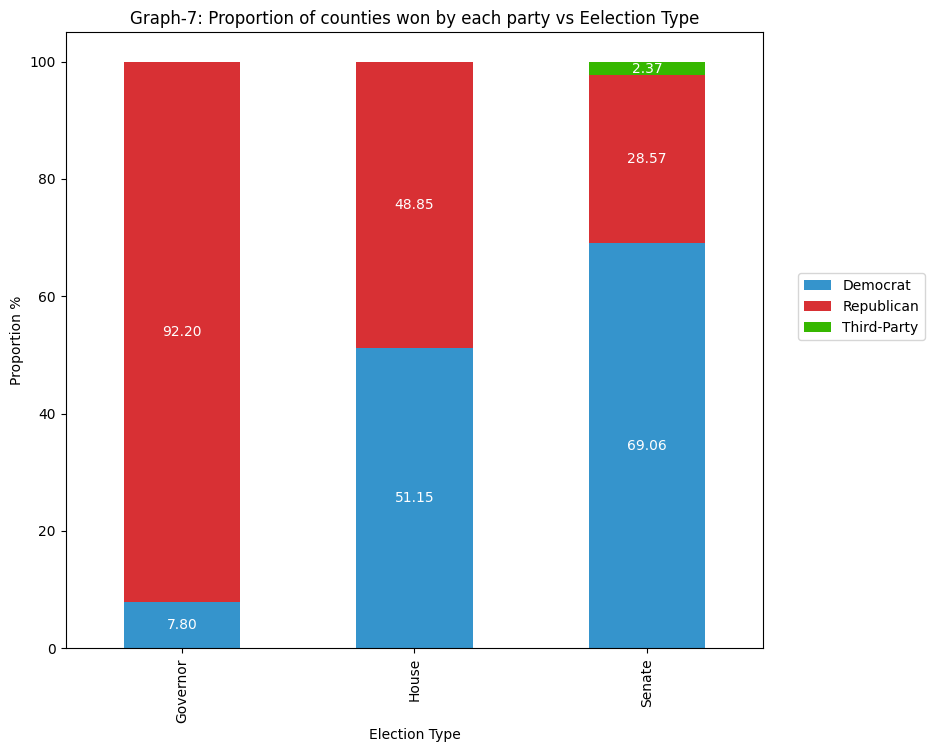

In [414]:
# Graph-7: Proportion of counties won by each party vs Eelection Type

# Prepare data
house_df = house_cand_won.groupby('party').agg(Proportion=('party', 'count')).reset_index().copy()
house_total_count = house_cand_won['party'].count()
house_df['Proportion'] = (house_df['Proportion'] / house_total_count) * 100.0

senate_df = senate_county_cand_won.groupby('party').agg(Proportion=('party', 'count')).reset_index().copy()
senate_total_count = senate_county_cand_won['party'].count()
senate_df['Proportion'] = (senate_df['Proportion'] / senate_total_count) * 100.0

governor_df = governor_county_cand_won.groupby('party').agg(Proportion=('party', 'count')).reset_index().copy()
governor_total_count = governor_county_cand_won['party'].count()
governor_df['Proportion'] = (governor_df['Proportion'] / governor_total_count) * 100.0

# Combine the DataFrames
house_df['Election Type'] = 'House'
senate_df['Election Type'] = 'Senate'
governor_df['Election Type'] = 'Governor'
combined_df = pd.concat([house_df, senate_df, governor_df])

# Pivot the DataFrame
#pivot_df = combined_df.pivot(index='party', columns='Election Type', values='Proportion')
pivot_df = combined_df.pivot(index='Election Type', columns='party', values='Proportion')

# Define custom colors for each type
colors = ['#3594cc', '#d83034', '#36b700']  
#colors = {
#    'Democrat': '#3594cc',  # Blue
#    'Republican': '#d83034',  # Red
#    'Third-Party': '#36b700'  # Green
#}

# Plotting with custom colors
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(9, 8), color=colors)

# Adding values on the bars
for i, party in enumerate(pivot_df.index):
    bottom = 0  # Track the bottom of each stack
    for j, type_col in enumerate(pivot_df.columns):
        value = pivot_df.loc[party, type_col]
        if value > 0:  # Only display values greater than 0
            ax.text(
                x=i,  # x-position of the bar
                y=bottom + value / 2,  # y-position (middle of the stack segment)
                s=f'{value:.2f}',  # Display value with 2 decimal places
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                color='white',  # Text color
                fontsize=10  # Font size
            )
        bottom += value  # Update the bottom for the next stack segment

# Adding labels and title
plt.xlabel('Election Type')
plt.ylabel('Proportion %')
plt.title('Graph-7: Proportion of counties won by each party vs Eelection Type')
plt.legend(loc=(1.05, 0.5))

# Show the plot
plt.show()

In [417]:
pivot_df

party,Democrat,Republican,Third-Party
Election Type,,,
Governor,7.804878,92.195122,NaN
House,51.146789,48.853211,NaN
Senate,69.062226,28.571429,2.366345


### Graph-8: Percentage of the won counties for each party vs Race

In [410]:
# Generate synthetic urbanization data (percentage of population living in urban areas)
urbanization = np.random.uniform(10, 100, num_counties)  # Percentage urban population

# Add urbanization data to the DataFrame
df["Urbanization (%)"] = urbanization

# Scatter Plot: Population vs. Democratic Vote, colored by Urbanization
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df["Population (millions)"], df["Democratic Vote (%)"], c=df["Urbanization (%)"], cmap="viridis", alpha=0.7)
plt.colorbar(scatter, label="Urbanization (%)")
plt.xlabel("Population (millions)")
plt.ylabel("Democratic Vote Share (%)")
plt.title("Population vs. Democratic Vote Share (Colored by Urbanization)")
plt.xscale("log")  # Log scale for population
plt.show()

NameError: name 'num_counties' is not defined

## Conclusion
Explain your findings in brief and scientic language. The minimum length for the conclusion in this project is one paragraph. Your
conclusion should briey summarize the takeaways from your project.